# Instalando dependências

In [ ]:
%pip install numpy
%pip install matplotlib

# Importando bibliotecas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq

# Questão 1

### Inserindo a tabela de dados $x$ e $y$

In [4]:
x = np.array([2,5,8,10,14,17,27,31,35,44], dtype=float)
y = np.array([94.8,98.7,81.3,74.9,68.7,64.0,49.3,44.0,39.1,31.6], dtype=float)


## a) Ajustando-se as funções $$ϕ_1(x) = a e^{bx}$$ $$ϕ_2(x) = \frac {x}{a + bx}$$ aos dados tabelados usando o método dos quadrados mínimos.

Para $ϕ_1(x)$ usa-se $ln(y) = ln(a) + bx$


In [5]:
lny = np.log(y)
A = np.vstack([np.ones_like(x), x]).T  # matriz (1, x)
coeffs_ln, _, _, _ = lstsq(A, lny, rcond=None)
ln_a, b1 = coeffs_ln
a1 = np.exp(ln_a)

def phi1(xv):
  return a1 * np.exp(b1 * xv)

Para $ϕ_2(x)$ usa-se $\frac{1}{y} = b+a \frac{1}{x}$

In [6]:
u = 1.0 / x
z = 1.0 / y
B = np.vstack([u, np.ones_like(u)]).T
coeffs_inv, _, _, _ = lstsq(B, z, rcond=None)
a2, b2 = coeffs_inv

def phi2(xv):
  return xv / (a2 + b2 * xv)

### Obtém-se desta forma os coeficientes
$$a_1 ≈ 102.52$$
$$b_1 ≈ -0.03$$
$$a_2 ≈ -0.03$$
$$b_2 ≈ 0.02$$

In [7]:
print("φ1: a =", a1, " b =", b1)
print("φ2: a =", a2, " b =", b2)

φ1: a = 102.51669347327372  b = -0.027212832315023253
φ2: a = -0.030136680100873003  b = 0.021218089149531036


## b) Plotando os pontos tabelados e os ajustes de $\phi_1(x)$ e $\phi_2(x)$


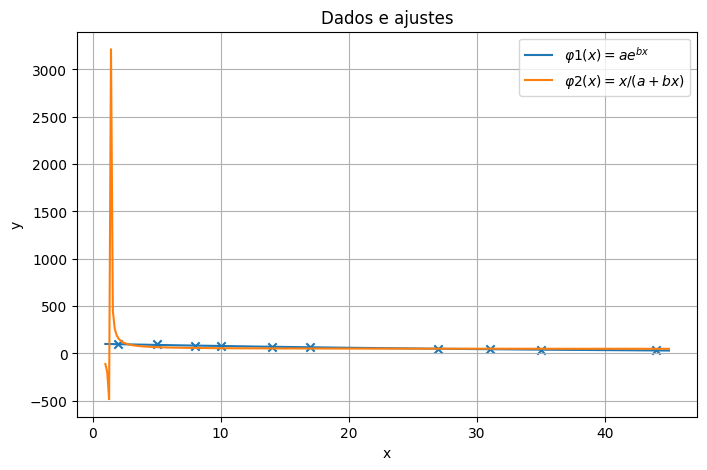

In [8]:
xx = np.linspace(min(x)-1, max(x)+1, 300)
plt.figure(figsize=(8,5))
plt.scatter(x, y, marker='x')
plt.plot(xx, phi1(xx), label='$φ1(x) = a e^{b x}$')
plt.plot(xx, phi2(xx), label='$φ2(x) = x/(a + b x)$')
plt.xlabel('x'); plt.ylabel('y')
plt.title('Dados e ajustes')
plt.legend()
plt.grid(True)
plt.show()


## c) Soma dos quadrados dos desvios J para cada ajuste das funções, obteve-se
$$J(a_1, b_1) ≈ 104.60$$
$$J(a_2, b_2) ≈ 7497.35$$

In [9]:
J1 = np.sum((phi1(x) - y)**2)
J2 = np.sum((phi2(x) - y)**2)

print("J1 =", J1)
print("J2 =", J2)


J1 = 104.59762801669335
J2 = 7497.3480466035835


## d) Os parâmetros estimados para φ2 produziram um denominador $a + bx$ que passa por zero ou fica muito pequeno para alguns x (especialmente em extrapolação para x próximos de 0), causando assim comportamento de picos (perceptível visualmente pelo gráfico). Além disso, com base nos resultados obtidos, a métrica utilizada para avaliar se o ajuste foi bom (no caso a soma J, a qual indica quanto mais longe os pontos estão da função ajustada) para a função $\phi_2$ foi 70  vezes maior. Por isso a função $φ_1$ é bem mais adequada do que a função $φ_2$ para se ajustar aos pontos tabelados

# Questão 2
### A escolha dos três pontos para o polinômio quadrático influencia levemente a resposta. Nessa questão foram selecionados triagens locais que se aproximam do valor esperado, ou seja pontos que cercam a região onde $f=0.6$ e que $g$ produz o intervalo correspondente

### Dados da tabela para $f(w)$ e $g(x)$

In [10]:
w = np.array([0.1,0.2,0.4,0.6,0.8,0.9], dtype=float)
fw = np.array([0.905,0.819,0.67,0.549,0.449,0.407], dtype=float)

xg = np.array([1.0,1.2,1.4,1.7,1.8], dtype=float)
gx = np.array([0.210,0.320,0.480,0.560,0.780], dtype=float)


### Interpolante de grau 2 para f em pontos próximos à $f=0.6$, para isso foram escolhidos $w=\{0.2,0.4,0.6\}$.


In [11]:
idx_f = [1,2,3]  # índices correspondentes a w=0.2,0.4,0.6
coefs_f = np.polyfit(w[idx_f], fw[idx_f], 2)  # [a2, a1, a0] (grau 2)
p_f = np.poly1d(coefs_f)

### Resolvendo para  $p_f(w) = 0.6$ obtém-se
$$w^* \approx 0.51, (f(w^*) = 0.6)$$

In [12]:
roots_w = np.roots(coefs_f - np.array([0,0,0.6]))  # subtrair 0.6 do termo constante
real_roots_w = [r.real for r in roots_w if abs(r.imag) < 1e-8]
w_star = None
for r in real_roots_w:
    # filtrar raiz plausível (dentro do intervalo dos dados)
    if 0.2 <= r <= 0.9:
        w_star = r
        break

print("w* tal que (f(w*) = 0.6) ≈", w_star)

w* tal que (f(w*) = 0.6) ≈ 0.5099749167562022


### Interpolante de grau 2 para g em pontos próximos à $g = w^*$, para isso foram escolhidos $x=\{1.4,1.7,1.8\}$


In [13]:
idx_g = [2,3,4]
coefs_g = np.polyfit(xg[idx_g], gx[idx_g], 2)
p_g = np.poly1d(coefs_g)

### Resolvendo para $p_g(x) = w^*$ obtém-se
$$x ≈ 1.67, (f(g(x)) = 0.6) $$


In [16]:
roots_x = np.roots(coefs_g - np.array([0,0,w_star]))
real_roots_x = [r.real for r in roots_x if abs(r.imag) < 1e-8]
x_solution = None
for r in real_roots_x:
    if 1.0 <= r <= 1.8:
        x_solution = r
        break
print("Solução x tal que f(g(x))≈0.6 -> x ≈", x_solution)


Solução x tal que f(g(x))≈0.6 -> x ≈ 1.667970804810369
